In [1]:
# 실장님께서 Port Congestion에서 가장 중요한 변수는 LA 경로 뿐이라고 말씀해주셔서 학습 변수에 LA 경로만 넣는 것으로 수정
# 로스앤젤레스는 west Coast North America에 위치하기 때문에 port congestion에서는 이것만 사용
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Merge한 데이터 불러오기
data_df =  pd.read_csv('Data_After_Corona.csv')
data_df = data_df.drop('Unnamed: 0', axis=1)
data_df.head()

,Date,SCFI Comprehensive Container Freight Rate Index,Shanghai-Europe (base port),SCFI Shanghai-Med (base port),SCFI Shanghai-WC America (base port),SCFI Shanghai-EC America (base port),SCFI Shanghai-Persian Gulf (Dubai),SCFI Shanghai-ANZ (Melbourne),SCFI Shanghai-W Africa (Lagos),SCFI Shanghai-S Africa (Durban),...,"Containership 13,000/13,500 TEU G'less Newbuilding Prices",5 Year $10m Finance based on Libor 1st yr,"Port Congestion Index - Containerships In Port, m.TEU, 7dma","Port Congestion Index - Containerships In Port, East Coast North America, m.TEU, 7dma","Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma","Port Congestion Index - Containerships In Port, United Kingdom/Continent, m.TEU, 7dma","Port Congestion Index - Containerships In Port, Mediterranean/Black Sea, m.TEU, 7dma","Port Congestion Index - Containerships In Port, East Asia, m.TEU, 7dma","Port Congestion Index - Containerships In Port, South East Asia, m.TEU, 7dma","Port Congestion Index - Containerships In Port, China P.R., m.TEU, 7dma"
0,2020-01-03,1022.72,1124.0,1185.0,1636.0,2808.0,1218.0,949.0,2744.0,1159.0,...,98.0,2.19,7.68,0.51,0.32,0.73,0.77,2.83,1.01,2.27
1,2020-01-10,1002.58,1058.0,1179.0,1543.0,2888.0,1175.0,937.0,2873.0,1150.0,...,98.0,2.19,7.75,0.51,0.35,0.78,0.79,2.83,0.99,2.21
2,2020-01-17,990.68,1010.0,1180.0,1562.0,2943.0,1123.0,949.0,2897.0,1084.0,...,98.0,2.19,7.71,0.53,0.31,0.77,0.78,2.88,0.91,2.27
3,2020-01-24,981.19,969.0,1179.0,1545.0,2951.0,1126.0,942.0,2908.0,1087.0,...,98.0,2.18,7.90,0.48,0.37,0.79,0.78,2.99,0.95,2.36
4,2020-02-14,910.58,850.0,1031.0,1423.0,2768.0,1089.0,892.0,2983.0,1066.0,...,98.0,2.17,7.73,0.46,0.37,0.80,0.81,2.79,0.95,2.26


In [3]:
X = data_df.iloc[:,[15,16,17,20,21,22,26]]
print(X.shape)
X.head()

(104, 7)


,Clarksons Average Containership Earnings,"HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam",Total Containerships - % Idle/Laid Up/Scrubber Retrofit,"Containership 13,000/14,000 TEU Newbuilding Prices","Containership 3,500/4,000 TEU (Wide Beam) G'less Newbuilding Prices","Containership 13,000/13,500 TEU G'less Newbuilding Prices","Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma"
0,15285.0,289.25,6.8,109.0,41.5,98.0,0.32
1,15268.0,297.25,7.0,109.0,41.5,98.0,0.35
2,15250.0,299.00,7.0,109.0,41.5,98.0,0.31
3,15161.0,301.00,6.7,109.0,41.5,98.0,0.37
4,14823.0,289.25,8.5,109.0,41.5,98.0,0.37


In [4]:
# Y데이터 불러오기
y = data_df.iloc[:, [0,1]]
#y.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')
y.head()

,Date,SCFI Comprehensive Container Freight Rate Index
0,2020-01-03,1022.72
1,2020-01-10,1002.58
2,2020-01-17,990.68
3,2020-01-24,981.19
4,2020-02-14,910.58


In [5]:
# 전처리 - MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
data_to_use = data_df.iloc[:,[1,15,16,17,20,21,22,26]]
data_to_use.head()

,SCFI Comprehensive Container Freight Rate Index,Clarksons Average Containership Earnings,"HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam",Total Containerships - % Idle/Laid Up/Scrubber Retrofit,"Containership 13,000/14,000 TEU Newbuilding Prices","Containership 3,500/4,000 TEU (Wide Beam) G'less Newbuilding Prices","Containership 13,000/13,500 TEU G'less Newbuilding Prices","Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma"
0,1022.72,15285.0,289.25,6.8,109.0,41.5,98.0,0.32
1,1002.58,15268.0,297.25,7.0,109.0,41.5,98.0,0.35
2,990.68,15250.0,299.00,7.0,109.0,41.5,98.0,0.31
3,981.19,15161.0,301.00,6.7,109.0,41.5,98.0,0.37
4,910.58,14823.0,289.25,8.5,109.0,41.5,98.0,0.37


In [6]:
# 데이터를 정규화하기 전에 test_train_split 해주기
from sklearn.model_selection import train_test_split

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=False)

In [7]:
# 잘 분리됐는지 확인하기 위해서 y_train, y_test 확인
y_train_df

,Date,SCFI Comprehensive Container Freight Rate Index
0,2020-01-03,1022.72
1,2020-01-10,1002.58
2,2020-01-17,990.68
3,2020-01-24,981.19
4,2020-02-14,910.58
...,...,...
78,2021-07-16,4054.42
79,2021-07-23,4100.00
80,2021-07-30,4196.24
81,2021-08-06,4225.86


In [8]:
y_test_df

,Date,SCFI Comprehensive Container Freight Rate Index
83,2021-08-20,4340.18
84,2021-08-27,4385.62
85,2021-09-03,4502.65
86,2021-09-10,4568.16
87,2021-09-17,4622.51
88,2021-09-24,4643.79
89,2021-10-01,4614.10
90,2021-10-08,4647.60
91,2021-10-15,4588.07
92,2021-10-22,4583.39


In [9]:
X_train_df

,Clarksons Average Containership Earnings,"HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam",Total Containerships - % Idle/Laid Up/Scrubber Retrofit,"Containership 13,000/14,000 TEU Newbuilding Prices","Containership 3,500/4,000 TEU (Wide Beam) G'less Newbuilding Prices","Containership 13,000/13,500 TEU G'less Newbuilding Prices","Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma"
0,15285.0,289.25,6.8,109.00,41.5,98.0,0.32
1,15268.0,297.25,7.0,109.00,41.5,98.0,0.35
2,15250.0,299.00,7.0,109.00,41.5,98.0,0.31
3,15161.0,301.00,6.7,109.00,41.5,98.0,0.37
4,14823.0,289.25,8.5,109.00,41.5,98.0,0.37
...,...,...,...,...,...,...,...
78,51709.0,410.25,4.2,134.00,47.0,130.0,0.77
79,52721.0,396.75,4.2,136.00,47.0,131.5,0.77
80,55463.0,412.75,4.3,137.00,47.0,132.0,0.83
81,64871.0,403.75,4.5,138.50,47.0,133.5,0.87


In [10]:
y_train_df

,Date,SCFI Comprehensive Container Freight Rate Index
0,2020-01-03,1022.72
1,2020-01-10,1002.58
2,2020-01-17,990.68
3,2020-01-24,981.19
4,2020-02-14,910.58
...,...,...
78,2021-07-16,4054.42
79,2021-07-23,4100.00
80,2021-07-30,4196.24
81,2021-08-06,4225.86


In [11]:
# 상재형이 말씀해주신거 근데 전체로 한 번에 해도 똑같을듯

scaler = MinMaxScaler()
# X_train에 의한 scaler를 만들어주고
scaler.fit(X_train_df)
# scaler를 이용해서 train 데이터 변환
train_scaled = scaler.transform(X_train_df)
train_df_scaled = pd.DataFrame(train_scaled)
train_df_scaled.columns = X.columns
# 그리고 X_test데이터도 X_train의 scaler와 똑같아야하니
test_scaled = scaler.transform(X_test_df)
test_df_scaled = pd.DataFrame(test_scaled)
test_df_scaled.columns = X.columns

In [12]:
train_df_scaled

,Clarksons Average Containership Earnings,"HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam",Total Containerships - % Idle/Laid Up/Scrubber Retrofit,"Containership 13,000/14,000 TEU Newbuilding Prices","Containership 3,500/4,000 TEU (Wide Beam) G'less Newbuilding Prices","Containership 13,000/13,500 TEU G'less Newbuilding Prices","Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma"
0,0.092011,0.561913,0.380282,0.187919,0.214286,0.076923,0.144928
1,0.091751,0.589240,0.408451,0.187919,0.214286,0.076923,0.188406
2,0.091476,0.595218,0.408451,0.187919,0.214286,0.076923,0.130435
3,0.090116,0.602050,0.366197,0.187919,0.214286,0.076923,0.217391
4,0.084950,0.561913,0.619718,0.187919,0.214286,0.076923,0.217391
...,...,...,...,...,...,...,...
78,0.648723,0.975235,0.014085,0.859060,1.000000,0.897436,0.797101
79,0.664191,0.929120,0.014085,0.912752,1.000000,0.935897,0.797101
80,0.706100,0.983775,0.028169,0.939597,1.000000,0.948718,0.884058
81,0.849894,0.953032,0.056338,0.979866,1.000000,0.987179,0.942029


In [13]:
# 1보다 큰 값이 나오는지 확인하기
test_df_scaled

,Clarksons Average Containership Earnings,"HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam",Total Containerships - % Idle/Laid Up/Scrubber Retrofit,"Containership 13,000/14,000 TEU Newbuilding Prices","Containership 3,500/4,000 TEU (Wide Beam) G'less Newbuilding Prices","Containership 13,000/13,500 TEU G'less Newbuilding Prices","Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma"
0,1.006557,0.870196,0.098592,1.020134,1.000000,1.012821,0.913043
1,1.014352,0.930828,0.098592,1.046980,1.071429,1.038462,0.826087
2,1.026136,0.945346,0.056338,1.073826,1.142857,1.064103,0.797101
3,1.034221,0.965841,0.112676,1.100671,1.214286,1.089744,0.811594
4,1.036988,0.999146,0.084507,1.100671,1.214286,1.102564,0.811594
5,1.038394,1.008540,0.056338,1.114094,1.214286,1.108974,0.840580
6,1.045104,1.077711,0.056338,1.127517,1.214286,1.115385,0.826087
7,1.046112,1.178480,0.056338,1.140940,1.214286,1.128205,0.927536
8,1.051493,1.240820,0.042254,1.140940,1.214286,1.128205,0.913043
9,1.051493,1.218617,0.056338,1.140940,1.214286,1.128205,0.942029


In [14]:
train_scaled

array([[0.09201094, 0.56191289, 0.38028169, 0.18791946, 0.21428571,
        0.07692308, 0.14492754],
       [0.09175111, 0.58923997, 0.4084507 , 0.18791946, 0.21428571,
        0.07692308, 0.1884058 ],
       [0.091476  , 0.59521776, 0.4084507 , 0.18791946, 0.21428571,
        0.07692308, 0.13043478],
       [0.0901157 , 0.60204953, 0.36619718, 0.18791946, 0.21428571,
        0.07692308, 0.2173913 ],
       [0.08494964, 0.56191289, 0.61971831, 0.18791946, 0.21428571,
        0.07692308, 0.2173913 ],
       [0.08366576, 0.61144321, 0.6056338 , 0.18791946, 0.21428571,
        0.07692308, 0.17391304],
       [0.08215263, 0.54483348, 0.54929577, 0.18791946, 0.21428571,
        0.07692308, 0.10144928],
       [0.07987528, 0.52263023, 0.53521127, 0.18791946, 0.21428571,
        0.07692308, 0.        ],
       [0.0776285 , 0.2442357 , 0.56338028, 0.18791946, 0.21428571,
        0.07692308, 0.08695652],
       [0.07409785, 0.15713066, 0.54929577, 0.18791946, 0.21428571,
        0.07692308, 0.1

In [15]:
test_scaled

array([[1.00655693, 0.87019641, 0.09859155, 1.02013423, 1.        ,
        1.01282051, 0.91304348],
       [1.01435187, 0.93082835, 0.09859155, 1.04697987, 1.07142857,
        1.03846154, 0.82608696],
       [1.026136  , 0.94534586, 0.05633803, 1.0738255 , 1.14285714,
        1.06410256, 0.79710145],
       [1.03422135, 0.96584116, 0.11267606, 1.10067114, 1.21428571,
        1.08974359, 0.8115942 ],
       [1.03698779, 0.99914603, 0.08450704, 1.10067114, 1.21428571,
        1.1025641 , 0.8115942 ],
       [1.03839394, 1.00853971, 0.05633803, 1.11409396, 1.21428571,
        1.10897436, 0.84057971],
       [1.0451037 , 1.07771136, 0.05633803, 1.12751678, 1.21428571,
        1.11538462, 0.82608696],
       [1.04611246, 1.17847993, 0.05633803, 1.1409396 , 1.21428571,
        1.12820513, 0.92753623],
       [1.0514925 , 1.24081981, 0.04225352, 1.1409396 , 1.21428571,
        1.12820513, 0.91304348],
       [1.0514925 , 1.21861657, 0.05633803, 1.1409396 , 1.21428571,
        1.12820513, 0.9

In [16]:
y_train_df

,Date,SCFI Comprehensive Container Freight Rate Index
0,2020-01-03,1022.72
1,2020-01-10,1002.58
2,2020-01-17,990.68
3,2020-01-24,981.19
4,2020-02-14,910.58
...,...,...
78,2021-07-16,4054.42
79,2021-07-23,4100.00
80,2021-07-30,4196.24
81,2021-08-06,4225.86


In [17]:
len(train_df_scaled)

83

In [18]:
# 학습을 시킬 데이터셋 생성

# window_size를 정의하여 학습 데이터를 생성할 예정입니다. window_size는 내가 얼마동안(기간)의 다음날 데이터를를 예측할 것인가를 정하는 parameter
# => 일단 3달로 해볼까? 3달 = 12주 = window_size = 12

# 다시 보니깐 12주를 모아서 다음 1주를 예측하는거네

def make_dataset(data, label, window_size=12, predict_week=1):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size) :
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [19]:
# train dataset
train_feature, train_label = make_dataset(train_df_scaled, y_train_df.iloc[:,[1]],12)
print(train_feature.shape, train_label.shape)

(71, 12, 7) (71, 1)


In [20]:
# train, validation set 생성
from sklearn.model_selection import train_test_split
# 만들어놓은 train 데이터를 다시 반으로 나눠서 하나는 학습용 하나는 검증용으로 씀 근데 이게 0.5이네
# 원래는 test_size가 0.5였음
X_train, X_test, y_train, y_test = train_test_split(train_feature, train_label, test_size=0.1, shuffle=False)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(63, 12, 7) (8, 12, 7)
(63, 1) (8, 1)


In [21]:
# test 데이터 만들어주기
test_feature, test_label = make_dataset(test_df_scaled, y_test_df.iloc[:,[1]],12)

In [22]:
test_feature

array([[[1.00655693, 0.87019641, 0.09859155, 1.02013423, 1.        ,
         1.01282051, 0.91304348],
        [1.01435187, 0.93082835, 0.09859155, 1.04697987, 1.07142857,
         1.03846154, 0.82608696],
        [1.026136  , 0.94534586, 0.05633803, 1.0738255 , 1.14285714,
         1.06410256, 0.79710145],
        [1.03422135, 0.96584116, 0.11267606, 1.10067114, 1.21428571,
         1.08974359, 0.8115942 ],
        [1.03698779, 0.99914603, 0.08450704, 1.10067114, 1.21428571,
         1.1025641 , 0.8115942 ],
        [1.03839394, 1.00853971, 0.05633803, 1.11409396, 1.21428571,
         1.10897436, 0.84057971],
        [1.0451037 , 1.07771136, 0.05633803, 1.12751678, 1.21428571,
         1.11538462, 0.82608696],
        [1.04611246, 1.17847993, 0.05633803, 1.1409396 , 1.21428571,
         1.12820513, 0.92753623],
        [1.0514925 , 1.24081981, 0.04225352, 1.1409396 , 1.21428571,
         1.12820513, 0.91304348],
        [1.0514925 , 1.21861657, 0.05633803, 1.1409396 , 1.21428571,
    

In [27]:
# 모델 생성 

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(10,
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=True)
          )
model.add(LSTM(10, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
         )

# model.add(Dropout(0.4))
# model.add(LSTM(10, 
#                input_shape=(train_feature.shape[1], train_feature.shape[2]), 
#                activation='relu', 
#                return_sequences=True)
#          )
# model.add(LSTM(10, 
#                input_shape=(train_feature.shape[1], train_feature.shape[2]), 
#                activation='relu', 
#                return_sequences=False)
#          )
model.add(Dropout(0.4))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 10)            720       
                                                                 
 lstm_3 (LSTM)               (None, 10)                840       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,571
Trainable params: 1,571
Non-trainable params: 0
_________________________________________________________________


In [28]:
import os
model_path = 'C:/Users/hyunj/KMI'
# 모델의 학습
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=3)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size= 4,
                    validation_data=(X_test, y_test)
                    #callbacks=[early_stop, checkpoint]
                    )

Epoch 1/100
16/16 [==============================] - 2s 21ms/step - loss: 4801257.5000 - val_loss: 16510156.0000
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 4800661.0000 - val_loss: 16507991.0000
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 4798949.5000 - val_loss: 16499412.0000
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 4794027.0000 - val_loss: 16440496.0000
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 4688416.5000 - val_loss: 15051564.0000
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 3626592.5000 - val_loss: 1265498.1250
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 1196000.3750 - val_loss: 648271.5000
Epoch 8/100
16/16 [==============================] - 0s 6ms/step - loss: 1256259.0000 - val_loss: 1342686.2500
Epoch 9/100
16/16 [==============================] - 0s 6ms/step - loss: 1121983.5000 - val_loss: 27362.644

16/16 [==============================] - 0s 7ms/step - loss: 667402.4375 - val_loss: 1212414.7500
Epoch 76/100
16/16 [==============================] - 0s 6ms/step - loss: 750274.6250 - val_loss: 429560.9062
Epoch 77/100
16/16 [==============================] - 0s 6ms/step - loss: 511330.9688 - val_loss: 412097.4062
Epoch 78/100
16/16 [==============================] - 0s 6ms/step - loss: 853113.7500 - val_loss: 664982.2500
Epoch 79/100
16/16 [==============================] - 0s 6ms/step - loss: 448705.9688 - val_loss: 1164958.7500
Epoch 80/100
16/16 [==============================] - 0s 7ms/step - loss: 897052.1250 - val_loss: 23040.5859
Epoch 81/100
16/16 [==============================] - 0s 6ms/step - loss: 646148.7500 - val_loss: 1050505.7500
Epoch 82/100
16/16 [==============================] - 0s 6ms/step - loss: 411191.0938 - val_loss: 582637.6250
Epoch 83/100
16/16 [==============================] - 0s 6ms/step - loss: 530071.8750 - val_loss: 304064.6250
Epoch 84/100
16/16 [=

In [29]:
# weight 로딩
#model.load_weights(filename)

# 예측
pred = model.predict(test_feature)

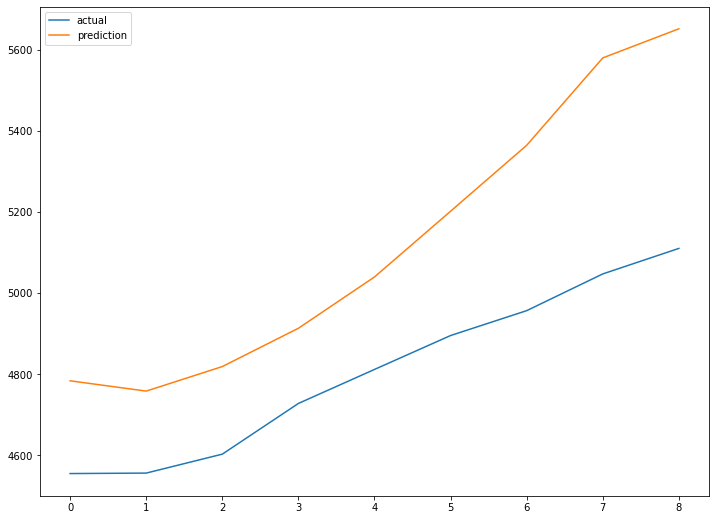

In [30]:
# 실제 데이터와 예측한 데이터 시각화

plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

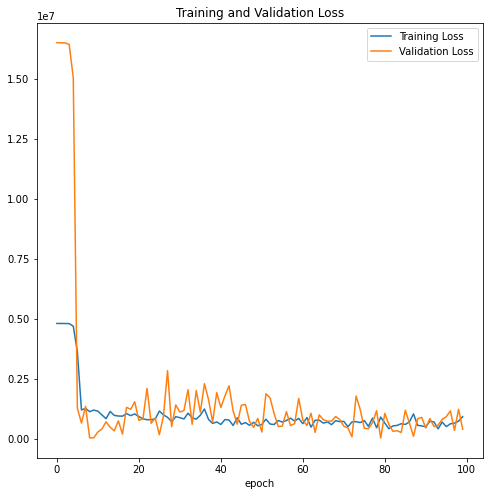

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss'] 
plt.figure(figsize=(8, 8)) 
plt.plot(loss, label='Training Loss') 
plt.plot(val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.xlabel('epoch') 
plt.show()

In [32]:
pred

array([[4782.895 ],
       [4757.5415],
       [4818.0767],
       [4912.5996],
       [5039.1655],
       [5201.373 ],
       [5364.0435],
       [5579.6685],
       [5651.5127]], dtype=float32)

In [33]:
test_label

array([[4554.04],
       [4555.21],
       [4601.97],
       [4727.06],
       [4810.98],
       [4894.62],
       [4956.02],
       [5046.66],
       [5109.6 ]])

In [34]:
# Mape 정의
# MAPE는 퍼센트 값을 가지며 0에 가까울수록 회귀 모형의 성능이 좋다고 해석할 수 있음
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape 
    
MAPE(test_label, pred)

6.4998359456861845

In [35]:
print('MAPE : ', MAPE(test_label, pred))


MAPE :  6.4998359456861845


In [36]:
# RMSE는 MSE에 ROOT값을 씌운 것

from sklearn.metrics import mean_squared_error
def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))
print('RMSE : ', RMSE(test_label, pred)) 

# 머지 왜 이리 낮지...

RMSE :  343.97291324240365


In [37]:
print('MSE : ', mean_squared_error(test_label, pred))

MSE :  118317.36504446616
